# Auswertung Adliswil

# Vorbereitung

Zuerst importiere ich die nötigen Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Ich setze die Option, dass ich später in den Dataframes alle Angaben sehe.

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Danach importiere ich die beiden Listen, die ich brauche. Jene mit den Vorstössen und jene mit den Namen und Parteien der Politiker/innen.

In [3]:
path = "All_Datas/daten_adliswil.csv"
df= pd.read_csv(path)

In [4]:
path2 = "All_Datas/Parlamentarier_Adliswil.csv"
df_parlamentarier = pd.read_csv(path2)

Damit ich die beiden Listen später mergen kann, muss ich aus den Listen in der Spalte Namen-neu des Vorstoss-Dataframes die einzelnen Elemente herausziehen. Ich will also eine separate Zeile für jede Person, die an einem Vorstoss beteilitgt war. Dazu mache ich eine Kopie des Dataframes, um nichts zu überschreiben. Danach zerteile ich mit der lambda-Funktion die Liste in einzelne Elemente. Und zwar immer dann, wenn ein Komma kommt. Mit der Funktion .explode teile ich die definierten Namen in der Liste schliesslich in einzelne Zeilen auf.

In [5]:
df.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],['Senn Mario'],1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']","['Mäder Gabriel', 'Schanz Simon', 'Stefan Neubert', 'Anke Würl', 'Martin Rüttimann', 'Walter Uebersax']",2
2,Zwischennutzung Stadthausareal,Postulat,Überwiesen,2011-09-07,[' Clesle Hanspeter'],['Clesle Hanspeter'],3


In [6]:
df_vorstoesse = df.copy()

df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].apply(lambda x: x if pd.isna(x) else x.split(','))
df_vorstoesse = df_vorstoesse.explode('Namen-neu')
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],['Senn Mario'],1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",['Mäder Gabriel',2
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",'Schanz Simon',2


Nun habe ich für alle Personen, die an einem Vorstoss beteiligt waren, eine einzelne Zeile. Um sie mit der Namensliste mergen zu können, müssen die Namen identisch sein. Ich muss also noch sämtliche Klammern und Anführungszeichen eliminieren. Das mache ich mit Hilfe von Regex.

In [7]:
df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].str.replace(r"[\[\]']|''", '').str.strip()
df_vorstoesse.head(3)

/var/folders/0_/g6gf3kvd4wd5y2c_ls8l_k280000gn/T/ipykernel_56197/273107438.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].str.replace(r"[\[\]']|''", '').str.strip()


,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],Senn Mario,1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",Mäder Gabriel,2
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",Schanz Simon,2


Als nächstes will ich die beiden Listen so zusammenfügen, dass ich mit den IDs der Politiker und der Vorstösse arbeiten kann. So kann ich verhindern, dass sich Fehler einschleichen, falls zwei Politiker/innen gleich heissen. Ich merge die beiden Listen zur df_ID.

In [8]:
df_ID = df_vorstoesse.merge(df_parlamentarier, left_on='Namen-neu', right_on='Name', how='left')[['ID-Vorstoss', 'ID-Politiker']]

In [9]:
df_ID.head(10)

,ID-Vorstoss,ID-Politiker
0,1,91
1,2,62
2,2,86
3,2,96
4,2,6
5,2,66
6,2,105
7,3,20
8,4,71
9,4,1


Jetzt habe ich die Grundlage geschaffen, um mit den konkreten Auswertungen beginnen zu konnen.

## 1. Welche Parteien reichen am häufigsten Vorstösse ein?

Als erstes merge ich die Dataframes df_ID und df_parlamentarier so, dass ich die Parteien pro Vorstoss sehe.

In [10]:
df_parteien = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','ID-Vorstoss']]
df_parteien.head(7)

,Partei,ID-Vorstoss
0,FDP,1
1,GLP,2
2,Die Mitte,2
3,GLP,2
4,Die Mitte,2
5,Die Mitte,2
6,Die Mitte,2


Danach gruppiere ich die Daten und schaue, dass es dank der Funktion .nunique() die Partei nur einmal zählt, wenn mehrere Politiker/innen der selben Partei an einem Vorstoss beteiligt sind. Ich will hier ja wissen, welche Partei - und nicht welche Person - wie oft an einem Vorstoss beteiligt war. Technisch gesehen, zähle ich also eigentlich die Anzahl verschiedener Vorstoss-IDs, an denen eine Partei beteiligt war.

In [11]:
partei_count = df_parteien.groupby('Partei')['ID-Vorstoss'].nunique().sort_values(ascending=False).reset_index()
partei_count.columns = ['Partei', 'Anzahl_Vorstoesse']
partei_count

,Partei,Anzahl_Vorstoesse
0,SP,64
1,FDP,58
2,FW,35
3,Die Mitte,33
4,SVP,27
5,Grüne,25
6,EVP,22
7,GLP,14


Nun will ich das Resultat in einem Säulendiagramm plotten. Dies auch gleich mit den entsprechenden Parteifarben.

In [12]:
partei_farben = {
    'SP': 'red',
    'FDP': 'blue',
    'FW': 'grey',
    'Die Mitte': 'orange',
    'SVP': 'yellow',
    'Grüne': 'lime',
    'EVP': 'gold',
    'GLP': 'darkgreen'
}

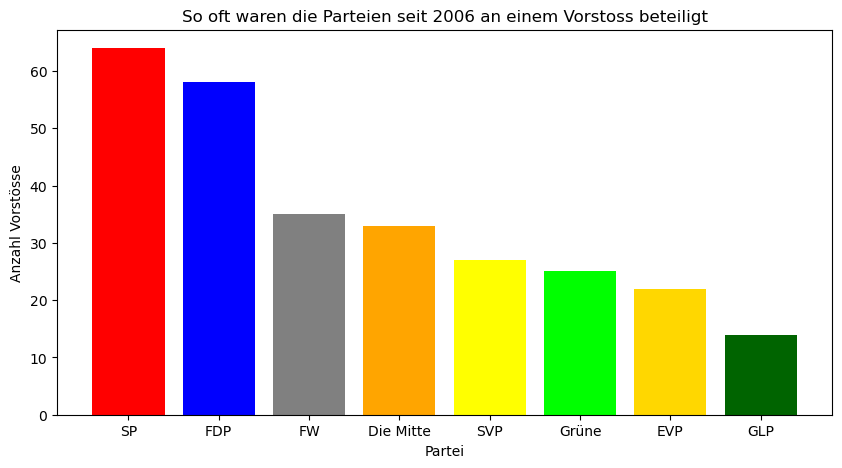

In [13]:
plt.figure(figsize=(10,5))
plt.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=[partei_farben[partei] for partei in partei_count['Partei']])
plt.title('So oft waren die Parteien seit 2006 an einem Vorstoss beteiligt')
plt.xlabel('Partei')
plt.ylabel('Anzahl Vorstösse')
plt.show()

## 2. Wie erfolgreich sind die Parteien mit ihren Vorstössen?

## 3. Welches sind die "fleissigsten" Parlamentarier - und wie erfolgreich sind sie?

## 4. Wie viele Vorstösse stammen von Männern und wie viele von Frauen?